# <font color='blue'> <div style='text-align: center'>Probability Distribution of the Wind Velocity

## <font color='green'> Reading the .txt file

In [1]:
import pandas as pd

# Reading the base file
df = pd.read_csv('Wind_Lidar_40and140.txt', delimiter=' ', header=None)

# Creating a list for the main header
Header = ['Year', 'Month', 'Day', 'Hour', 'V (Z=40m)', 'V (Z=140m)']

# Connecting the headers with the dataframe
df.columns = Header

df.head()

,Year,Month,Day,Hour,V (Z=40m),V (Z=140m)
0,2014,8,1,0.00000,3.63,5.10
1,2014,8,1,0.16667,3.46,5.16
2,2014,8,1,0.33333,3.57,5.98
3,2014,8,1,0.50000,3.46,5.58
4,2014,8,1,0.66667,3.57,4.81


## <font color='green'> Importing dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [3]:
# Power Density Method (POD)
def POD(data):
    """"""
    # Creating an array for the velocities
    V = data.values
    
    # Obtaining the number of velocities in the data
    n = len(data)
    
    # Obtaining the mean value for the velocity
    avg = data.mean()
    
    # Sum of velocities cube
    sm = sum(pow(data.values, 3))
    
    # Calculating the Energy Pattern Factor
    Epf = 1/pow(avg, 3) * (sm/n)
    
    # Calculating the shape parameter k
    k_pod = 1 + 3.69/pow(Epf, 2)
    
    return k_pod

In [4]:
# Maximum Likelihood Estimate (MLE)
def MLE(data):
    """"""
    # Defining the x coordinates
    x = np.sort(np.log(data.values))
    
    x1 = min(data.values)
    y1 = max(data.values)+1
    CDF1 = np.arange(1, len(data)+1) /len(data)

    # Defining y coordinates
    CDF2 = CDF1
    for i in range (len(CDF2)):
        if CDF2[i] == 1:
            CDF2[i] = CDF2[i - 1]
    y = np.log(-np.log(1 - CDF2))
    
    # Fitting with a linear regression
    ft = np.polyfit(x, y, 1)
    kmle = ft[0] # Shape parameter
    cmle = np.exp(-(ft[1]/kmle)) # Scale parameter
    
    # Plotting
    plt.figure(figsize=(16,6))
    plt.subplot(1, 2, 1)
    plt.plot(np.sort(data.values), CDF1, 'b-', linewidth=3)
    plt.title('Cumulative Distribution Function')
    plt.xlabel('V [m/s]')
    plt.ylabel('F(V)')
    
    plt.subplot(1, 2, 2)
    plt.plot(x, y, 'k.')
    plt.plot(x, np.polyval(ft, x), 'r-', label='Linear regression')
    plt.title('Logarithmic Representation for MLE')
    plt.xlabel('ln (Vi)')
    plt.ylabel('Gi')
    
    return (ft, kmle, cmle)

For wind speed at 40 meters height:
k = 2.68 c = 5.13 

For wind speed at 140 meters height
k = 2.52 c = 7.66


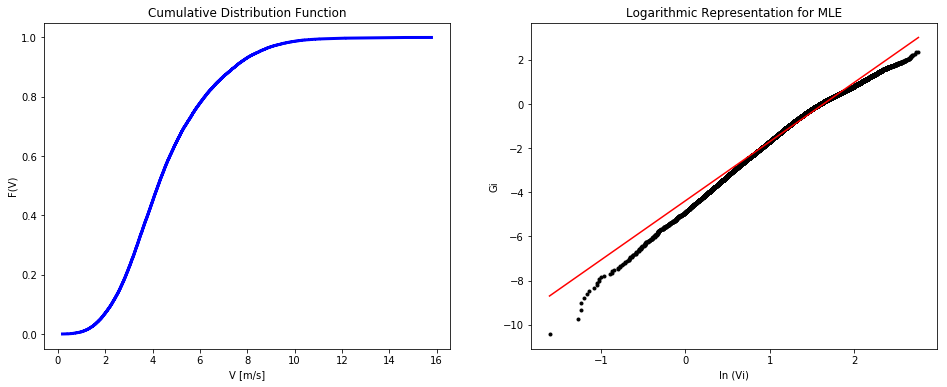

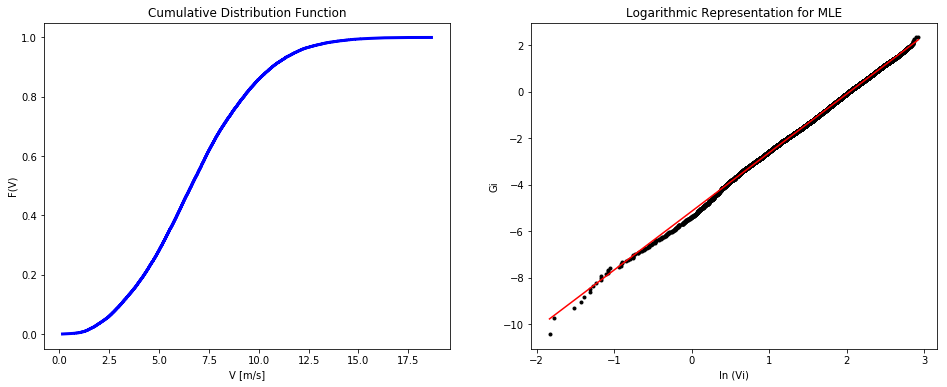

In [5]:
ft_40, k_40, c_40 = MLE(df['V (Z=40m)'])
print('For wind speed at 40 meters height:')
print('k =', round(k_40, 2), 'c =', round(c_40, 2), '\n')

ft_140, k_140, c_140 = MLE(df['V (Z=140m)'])
print('For wind speed at 140 meters height')
print('k =', round(k_140, 2), 'c =', round(c_140, 2))

In [6]:
def weib(data, k=3, c=5):
    x = np.sort(data.values)
    y = (k/c) * pow(x/c, k-1) * np.exp(- pow(x/c, k))
        
    return (x, y)

In [7]:
data_40 = df['V (Z=40m)']
data_140 = df['V (Z=140m)']

# Returning the shape factor
pod_40 = POD(data_40)
pod_140 = POD(data_140)

error_40 = abs(pod_40 - k_40)/k_40 * 100
error_140 = abs(pod_140 - k_140)/k_140 * 100

print('Comparing the Power Density Method (POD) and the Maximum Likelihood Estimate (MLE):\n')
print('For the wind speed at 40 meters height:')
print('POD --> k =', round(pod_40, 2), '; MLE --> k =', round(k_40, 2), '; Diff =', round(error_40, 2), '%')
print('For the wind speed at 140 meters height:')
print('POD --> k =', round(pod_140, 2), '; MLE --> k =', round(k_140, 2), '; Diff =', round(error_140, 2), '%')

# Weibull distribution based on MLE parameters only
w_x_40, w_y_40 = weib(data=data_40, k=k_40, c=c_40)
w_x_140, w_y_140 = weib(data=data_140, k=k_140, c=c_140)

# Weibull distribution based on POD shape parameter and MLE scale parameter
POD_w_x_40, POD_w_y_40 = weib(data=data_40, k=pod_40, c=c_40)
POD_w_x_140, POD_w_y_140 = weib(data=data_140, k=pod_140, c=c_140)

Comparing the Power Density Method (POD) and the Maximum Likelihood Estimate (MLE):

For the wind speed at 40 meters height:
POD --> k = 2.33 ; MLE --> k = 2.68 ; Diff = 13.07 %
For the wind speed at 140 meters height:
POD --> k = 2.49 ; MLE --> k = 2.52 ; Diff = 1.21 %


[ 0.          0.10050251  0.20100503  0.30150754  0.40201005  0.50251256
  0.60301508  0.70351759  0.8040201   0.90452261  1.00502513  1.10552764
  1.20603015  1.30653266  1.40703518  1.50753769  1.6080402   1.70854271
  1.80904523  1.90954774  2.01005025  2.11055276  2.21105528  2.31155779
  2.4120603   2.51256281  2.61306533  2.71356784  2.81407035  2.91457286
  3.01507538  3.11557789  3.2160804   3.31658291  3.41708543  3.51758794
  3.61809045  3.71859296  3.81909548  3.91959799  4.0201005   4.12060302
  4.22110553  4.32160804  4.42211055  4.52261307  4.62311558  4.72361809
  4.8241206   4.92462312  5.02512563  5.12562814  5.22613065  5.32663317
  5.42713568  5.52763819  5.6281407   5.72864322  5.82914573  5.92964824
  6.03015075  6.13065327  6.23115578  6.33165829  6.4321608   6.53266332
  6.63316583  6.73366834  6.83417085  6.93467337  7.03517588  7.13567839
  7.2361809   7.33668342  7.43718593  7.53768844  7.63819095  7.73869347
  7.83919598  7.93969849  8.04020101  8.14070352  8

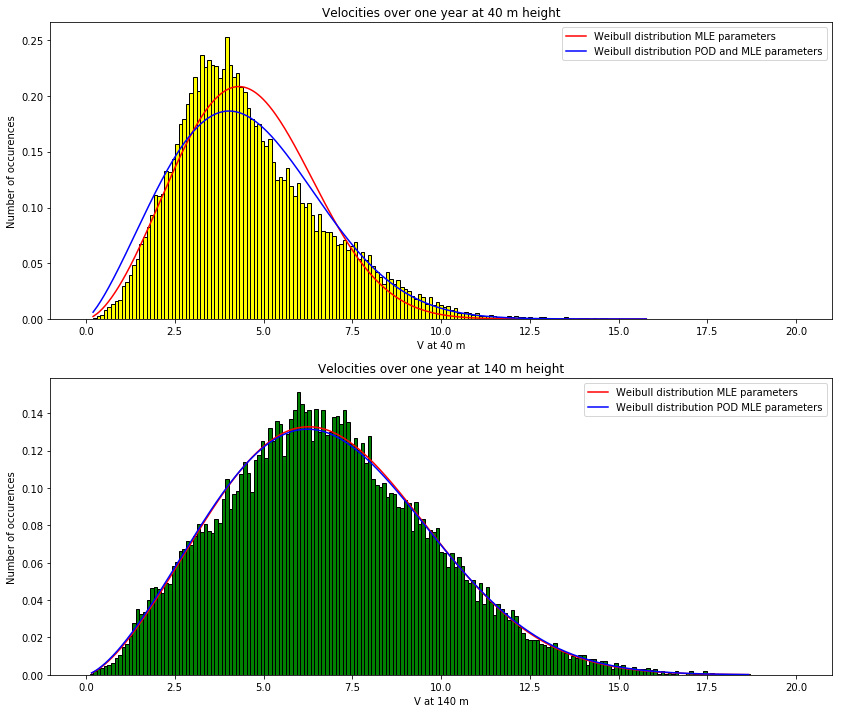

In [19]:
#bins_40 = np.linspace(min(data_40.values), max(data_40.values) + 1, int((max(data_40.values) - min(data_40.values) + 2) * 4))
#bins_140 = np.linspace(min(data_140.values), max(data_140.values) + 1, 
#                       int((max(data_140.values) - min(data_140.values) + 2) * 4))

bins_40 = np.linspace(0, 20, int(20 / 0.1))
bins_140 = np.linspace(0, 20, int(20 / 0.1))

print(bins_40)

plt.figure(figsize=(14,12))

plt.subplot(2, 1, 1)
plt.hist(data_40, bins=bins_40, histtype='bar', color='yellow',edgecolor='black', density='True')
plt.plot(w_x_40, w_y_40, 'r-', label='Weibull distribution MLE parameters')
plt.plot(POD_w_x_40, POD_w_y_40, 'b-', label='Weibull distribution POD and MLE parameters')
plt.title('Velocities over one year at 40 m height')
plt.xlabel('V at 40 m')
plt.ylabel('Number of occurences')
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(data_140, bins=bins_140, histtype='bar', color='green', edgecolor='black', density='True')
plt.plot(w_x_140, w_y_140, 'r-', label='Weibull distribution MLE parameters')
plt.plot(POD_w_x_140, POD_w_y_140, 'b-', label='Weibull distribution POD MLE parameters')
plt.title('Velocities over one year at 140 m height')
plt.xlabel('V at 140 m')
plt.ylabel('Number of occurences')
plt.legend()


In [12]:
# Extrapolation method

# Shape and sclae parameters for 40 meters height
k1 = k_40
c1 = c_40

# Original and extrapolated height, respectively
z1 = 40
z2 = 140

# Alpha considered
alpha = 0.31

# Justus & Mikhail formulation
c2 = round(c1 * (z2 / z1)**alpha, 2)
k2 = round(k1 / (1 - 0.0881 * np.log(z2 / z1)), 2)

print('The new shape parameter (k) is {}\nThe new scale parameter (c) is {}'.format(k2, c2))

The new shape parameter (k) is 3.01
The new scale parameter (c) is 7.56


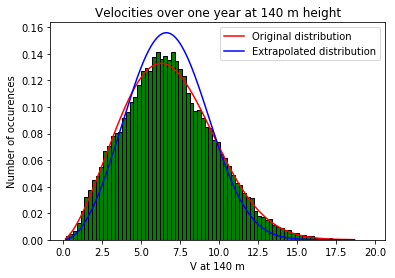

In [13]:
w2_x_140, w2_y_140 = weib(data=data_140, k=k2, c=c2)

plt.hist(data_140, bins=bins_140, histtype='bar', color='green', edgecolor='black', density='True')
plt.plot(w_x_140, w_y_140, 'r-', label='Original distribution')
plt.plot(w2_x_140, w2_y_140, 'b-', label='Extrapolated distribution')
plt.title('Velocities over one year at 140 m height')
plt.xlabel('V at 140 m')
plt.ylabel('Number of occurences')
plt.legend()

In [28]:
# Binning
labels = []
bins = []
for i in range (200):
    Vi = round(i / 10 + 0.05, 2)
    labels.append(Vi)
    ii = i / 10
    bins.append(ii)
bins.append(ii + 0.1)

df['Binned_40'] = pd.cut(df['V (Z=40m)'], bins=bins, labels=labels)
df['Binned_140'] = pd.cut(df['V (Z=140m)'], bins=bins, labels=labels)
display(df.head())

,Year,Month,Day,Hour,V (Z=40m),V (Z=140m),Binned_40,Binned_140
0,2014,8,1,0.00000,3.63,5.10,3.65,5.05
1,2014,8,1,0.16667,3.46,5.16,3.45,5.15
2,2014,8,1,0.33333,3.57,5.98,3.55,5.95
3,2014,8,1,0.50000,3.46,5.58,3.45,5.55
4,2014,8,1,0.66667,3.57,4.81,3.55,4.85


In [58]:
power = 2000
H_height = 140
P = []
for v in labels:
    if v < 11:
        Pi = 1.5 * v ** 3
    elif (v >= 11 and v < 25):
        Pi = power
    else:
        Pi = 0
    P.append(Pi)



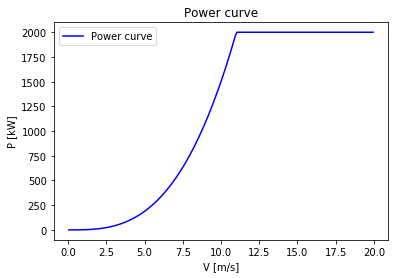

In [63]:
plt.plot(labels, P, 'b-', label='Power curve')
plt.title('Power curve')
plt.xlabel('V [m/s]')
plt.ylabel('P [kW]')
plt.legend()

In [62]:
# Grouping
df1 = df.groupby('Binned_140')['Binned_140'].count()
N = df1.values

num = 0
den = 0

for i in range (len(N)):
    num += (N[i] * P[i])
    den += N[i]

P_mean = round(num / den, 3)

# Capacity factor
Cp = round(P_mean / power * 100, 2)

print(P_mean)
print(Cp, '%')

652.853
32.64 %


654.998


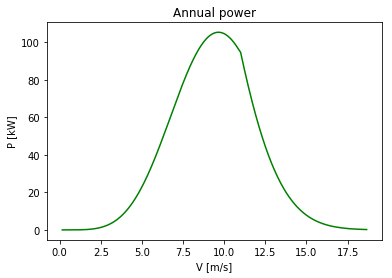

In [70]:
P2 = []

for v in w_x_140:
    if v < 11:
        Pi = 1.5 * v ** 3
    elif (v >= 11 and v < 25):
        Pi = power
    else:
        Pi = 0
    P2.append(Pi)

new_y = P2 * w_y_140

plt.plot(w_x_140, new_y, 'g-')
plt.title('Annual power')
plt.xlabel('V [m/s]')
plt.ylabel('P [kW]')

Area = round(np.trapz(new_y, w_x_140), 3)
print(Area)